### Cash or Nothing Binary put option

Importing important libraries\
**Pandas** for dataframe manipulation\
**Numpy** for mathematical operations\
**Matplotlib** for charts and graphs\
**yfinance** for downloading the stock market data

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm as normal
from scipy.stats import ttest_rel
import yfinance 
import matplotlib.pyplot as plt
%matplotlib inline

The Amazon stock data was gotten from *yfinance*

In [2]:
amazon = yfinance.download("AMZN", start="2020-03-01", end="2021-03-01")
amazon.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,1906.489990,1954.510010,1870.000000,1953.949951,1953.949951,6761700
2020-03-03,1975.369995,1996.329956,1888.089966,1908.989990,1908.989990,7534500
2020-03-04,1946.569946,1978.000000,1922.000000,1975.829956,1975.829956,4772900
2020-03-05,1933.000000,1960.719971,1910.000000,1924.030029,1924.030029,4748200
2020-03-06,1875.000000,1910.869995,1869.500000,1901.089966,1901.089966,5273600


#### Description of amazon stock

In [3]:
amazon.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,2878.268368,2916.571464,2836.458247,2877.467880,2877.467880,4.837083e+06
std,482.335284,480.748299,475.376145,475.356083,475.356083,1.833096e+06
min,1641.510010,1759.449951,1626.030029,1676.609985,1676.609985,1.451900e+06
25%,2462.500000,2486.500000,2443.354980,2471.724976,2471.724976,3.486100e+06
50%,3120.429932,3156.379883,3083.979980,3111.889893,3111.889893,4.394800e+06
75%,3209.344971,3247.234985,3165.714966,3205.604980,3205.604980,5.757700e+06
max,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,1.203820e+07


## Price Movement

C:\Users\PC\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


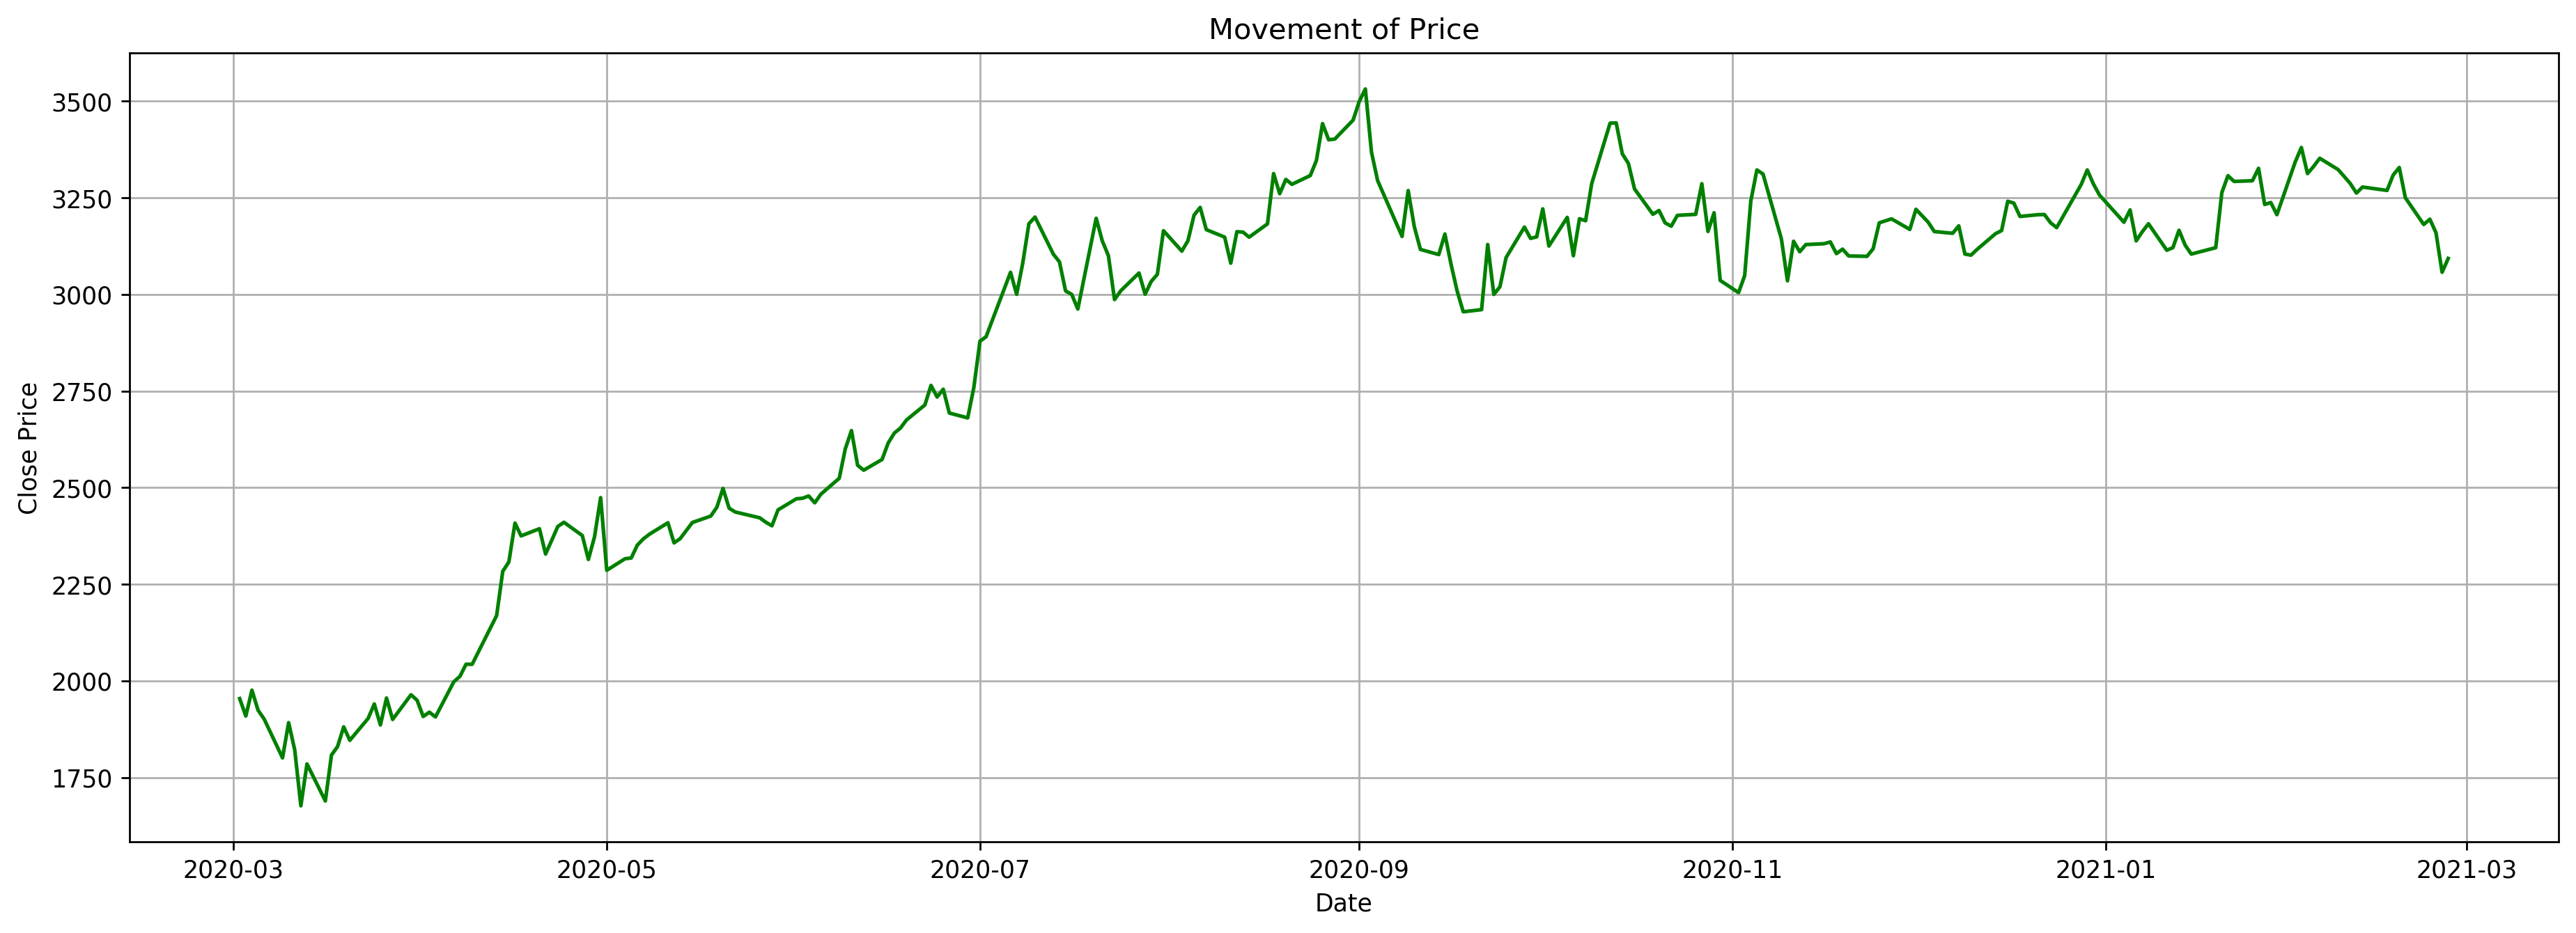

In [4]:
plt.figure(figsize=[18, 6], facecolor="w", dpi=250)
plt.grid()
plt.plot(amazon.index, amazon["Close"], color='green')
plt.xlabel("Date") 
plt.ylabel("Close Price")
plt.title("Movement of Price")
plt.show()

#### Stock returns

In [5]:
return_ = (amazon['Adj Close'] - amazon['Adj Close'].shift(1)) / amazon['Adj Close'].shift(1)
return_[1:]

Date
2020-03-03   -0.023010
2020-03-04    0.035013
2020-03-05   -0.026217
2020-03-06   -0.011923
2020-03-09   -0.052854
                ...   
2021-02-22   -0.021281
2021-02-23    0.004326
2021-02-24   -0.010947
2021-02-25   -0.032400
2021-02-26    0.011700
Name: Adj Close, Length: 250, dtype: float64

In [6]:
np.mean(return_) ### Average return for amazon 

0.0021244637601267537

C:\Users\PC\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\PC\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, '12 Month Volatility')

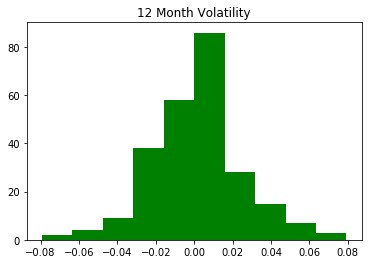

In [7]:
plt.hist(return_, bins=10, color="green")
plt.title("12 Month Volatility")

In [8]:
#12 months annualized volatility
anu_vol = round(np.std(return_) * np.sqrt(252), 4)
anu_vol

0.3799

Text(0.5, 1.0, '6 Month Volatility')

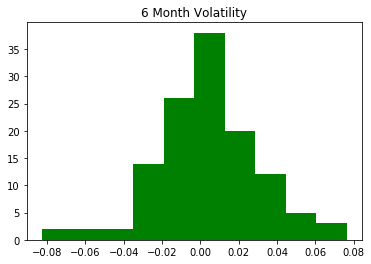

In [9]:
plt.hist(amazon['Adj Close'][:125].pct_change().apply(lambda x: np.log(1+x)), bins=10, color="green")
plt.title("6 Month Volatility")

###### 6 month volatility

In [10]:
#6 months annualized volatility
anu_six_vol = round(amazon['Adj Close'][:125].pct_change().apply(lambda x: np.log(1+x)).std() * np.sqrt(252), 4)
anu_six_vol

0.4207

### Black Scholes

In [31]:
def BsmModel(S, X, t, r, sig):    
    d1 = (np.log(S/X) + (r + 0.5 * sig ** 2) * t) / (sig * np.sqrt(t))
    d2 = d1 - sig * np.sqrt(t)
    return np.exp(-r*(t)) * (1- normal.cdf(d2))
        
def theta(S, X, t, r, sig):
    d1 = (np.log(S/X) + (r + 0.5 * sig ** 2) * t) / (sig * np.sqrt(t))
    d2 = d1 - sig * np.sqrt(t)
    lf = (r*np.exp(-r*t)*(1 - normal.cdf(d2))) - (np.exp(-r*t)*normal.pdf(d2)*((d1/(2*t))-((r)/(sig*np.sqrt(t))))) 
    return np.round(lf, 4)
        
def gamma(S, X, t, r, sig):
    d1 = (np.log(S/X) + (r + 0.5 * sig ** 2) * t) / (sig * np.sqrt(t))
    d2 = d1 - sig * np.sqrt(t)
    gamma = (np.exp(-r * t) * d1 * normal.pdf(d2))/((sig ** 2) * (S**2)*(np.sqrt(t)))
    return np.round(gamma, 4)
    
def vega(S, X, t, r, sig):
    d1 = (np.log(S/X) + (r + 0.5 * sig ** 2) * t) / (sig * np.sqrt(t))
    d2 = d1 - sig * np.sqrt(t)
    vega = (np.exp(-r*t)*normal.pdf(d2))*(d1/sig)
    return np.round(vega, 4)
    
def delta(S, X, t, r, sig):
    d1 = (np.log(S/X) + (r + 0.5 * sig ** 2) * t) / (sig * np.sqrt(t))
    d2 = d1 - sig * np.sqrt(t)
    return np.round(-(np.exp(-r*t)* normal.pdf(d2))/(sig*S*np.sqrt(t)), 4)
    
def speed(S, X, t, r, sig):
    d1 = (np.log(S/X) + (r + 0.5 * sig ** 2) * t) / (sig * np.sqrt(t))
    d2 = d1 - sig * np.sqrt(t)
    return (np.exp(-r*t)*normal.pdf(d2)/((sig**2) * (S**3)*np.sqrt(t))) * (-2*d1 + ((1 - d1*d2)/(sig*np.sqrt(t))))
        
    

### Binomial Tree

In [26]:
def BinomialModel(S, X, t, r, sig, N=3):
    time_to_expiry = float(t) / N
    up_factor = np.exp(sig * np.sqrt(time_to_expiry))
    down_factor = 1/up_factor
    a = np.exp(r * time_to_expiry)
    up_factor_prob = (a - down_factor)/(up_factor - down_factor)
    down_factor_prob = 1 - up_factor_prob
    
    S0 = np.zeros((N+1, N+1))
    S0[0, 0] = S                                  ### S0 is the strike price
    z = 1
    for t in range(1, N + 1):
        for i in range(z):
            S0[i, t] = S0[i, t-1] * up_factor
            S0[i+1, t] = S0[i, t-1] * down_factor
        z+= 1 
            
    V = np.zeros_like(S0)   
    S_T = S0[:,-1]
    V[:,-1] = np.heaviside(X - S_T, 0.0)

    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.exp(-r * time_to_expiry) * (up_factor_prob * V[i,j + 1] + down_factor_prob * V[i + 1,j + 1])
    return V[0,0]
       

## Model

In [14]:
amazon.loc["2020-11-17"]["Adj Close"] ### The stock price used for the models

3135.659912109375

In [27]:
price = amazon.loc["2020-11-17"]["Adj Close"]
strike = 3125 ####strike or exercise price
time = 50/360  ### days
sig = anu_vol
rate = .045

**Black Scholes Model**

In [28]:
BSMprice = BsmModel(S=price, X=strike, t=time, r=.045, sig=sig)
BSMprice

0.4979128004494803

**Binomial Tree**

In [29]:
BTprice = BinomialModel(S=price, X=strike, t=time, r=.045, sig=sig)
BTprice

0.508334269739486

## Greeks

### Delta

In [32]:
delta(S=price, X=strike, t=time, r=.045, sig=sig)

-0.0009

In [33]:
d = np.linspace(50,150,11)
delt = np.zeros_like(d)
for index, i in enumerate(d):
    delt[index] =  delta(S=i, X=100, t=1, r=.04, sig=sig)

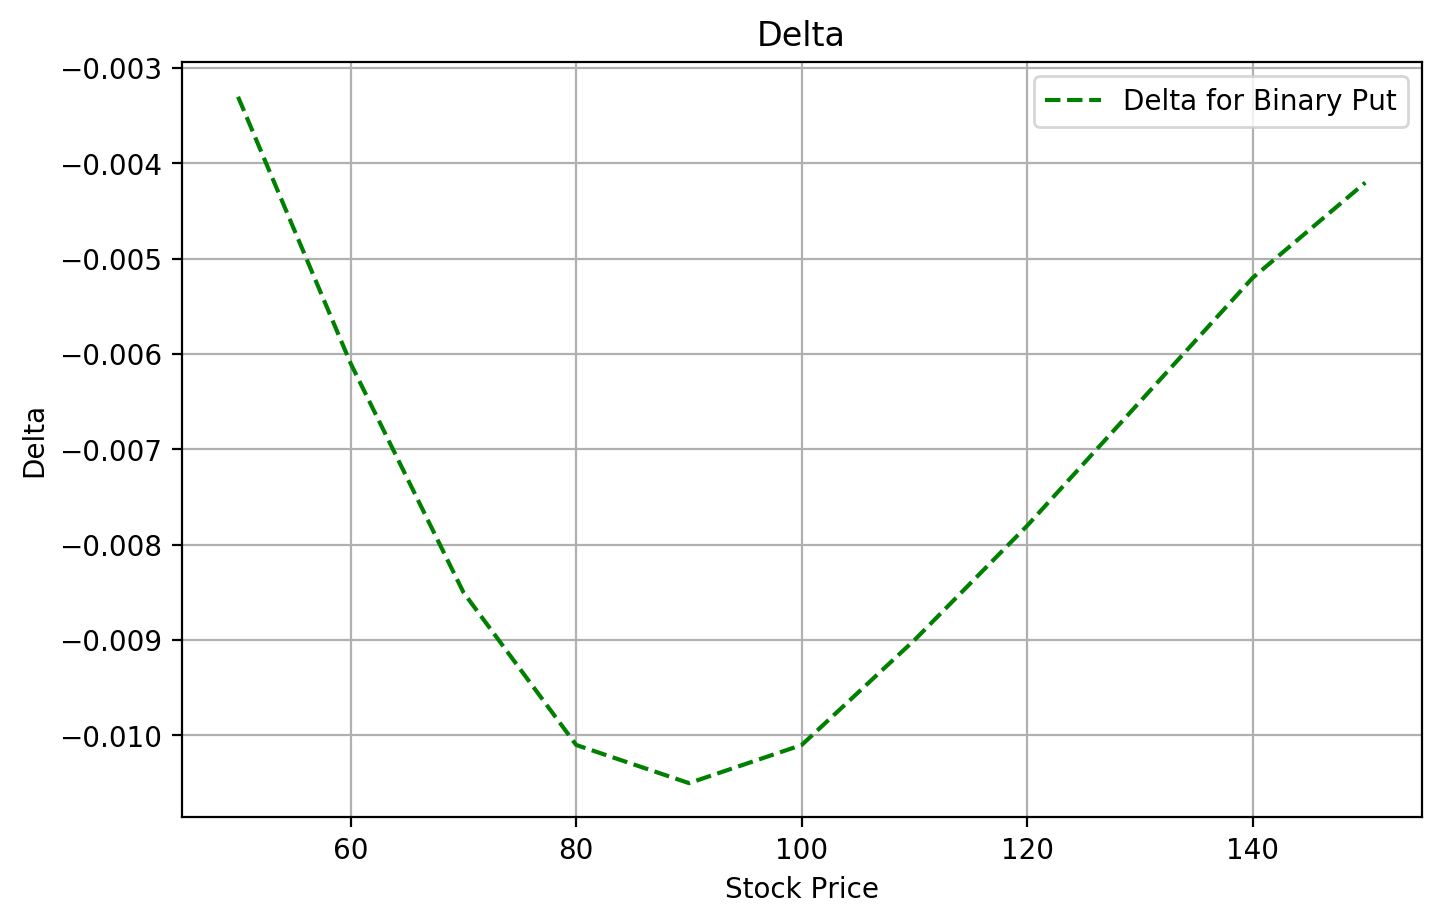

In [34]:
plt.figure(figsize=(8, 5), dpi=200)
plt.plot(d, delt, '--', color="green")
plt.grid(b=True)
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Binary Put'])

### Speed

In [36]:
round(speed(S=price, X=strike, t=time, r=.045, sig=sig), 4)

0.0

In [37]:
s = np.linspace(70,150,11)
spee = np.zeros((len(s), 1))
for i in range(len(s)):
    spee[i] = speed(S=s[i], X=100, t=1, r=.05, sig=sig)   

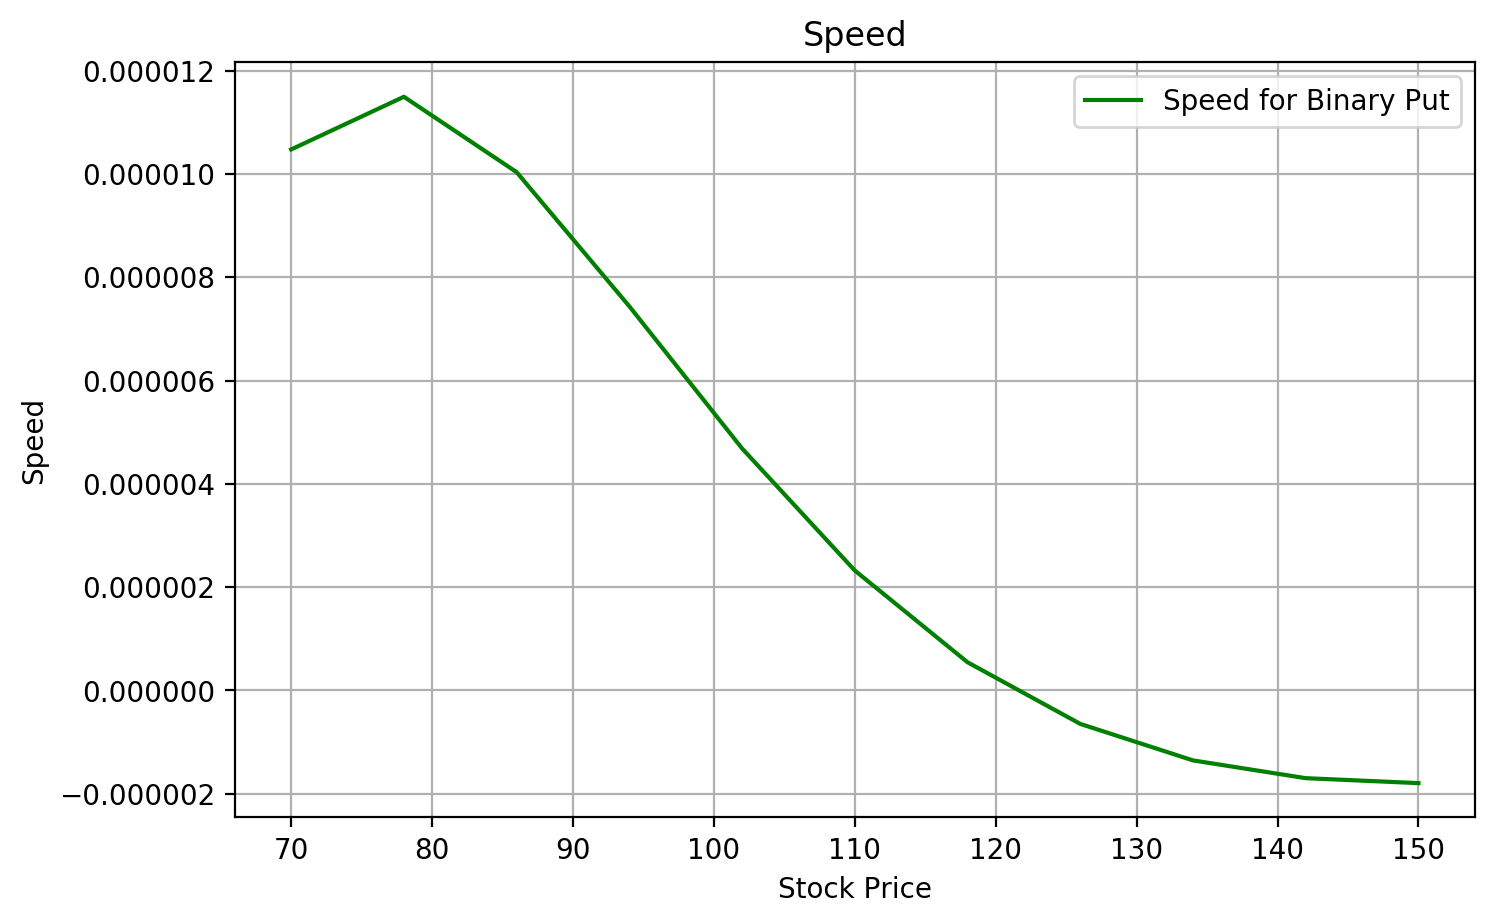

In [39]:
plt.figure(figsize=(8, 5), dpi=200)
plt.plot(s, spee, '-', color="green")
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Binary Put'])

### Theta

In [40]:
theta(S=price, X=strike, t=time, r=.045, sig=sig)

-0.05

In [41]:
Th = np.linspace(0.2, 1, 12)
_Th = np.zeros_like(Th)
for index, i in enumerate(Th):
    _Th[index] = theta(S=100, X=100, t=i, r=.05, sig=sig)

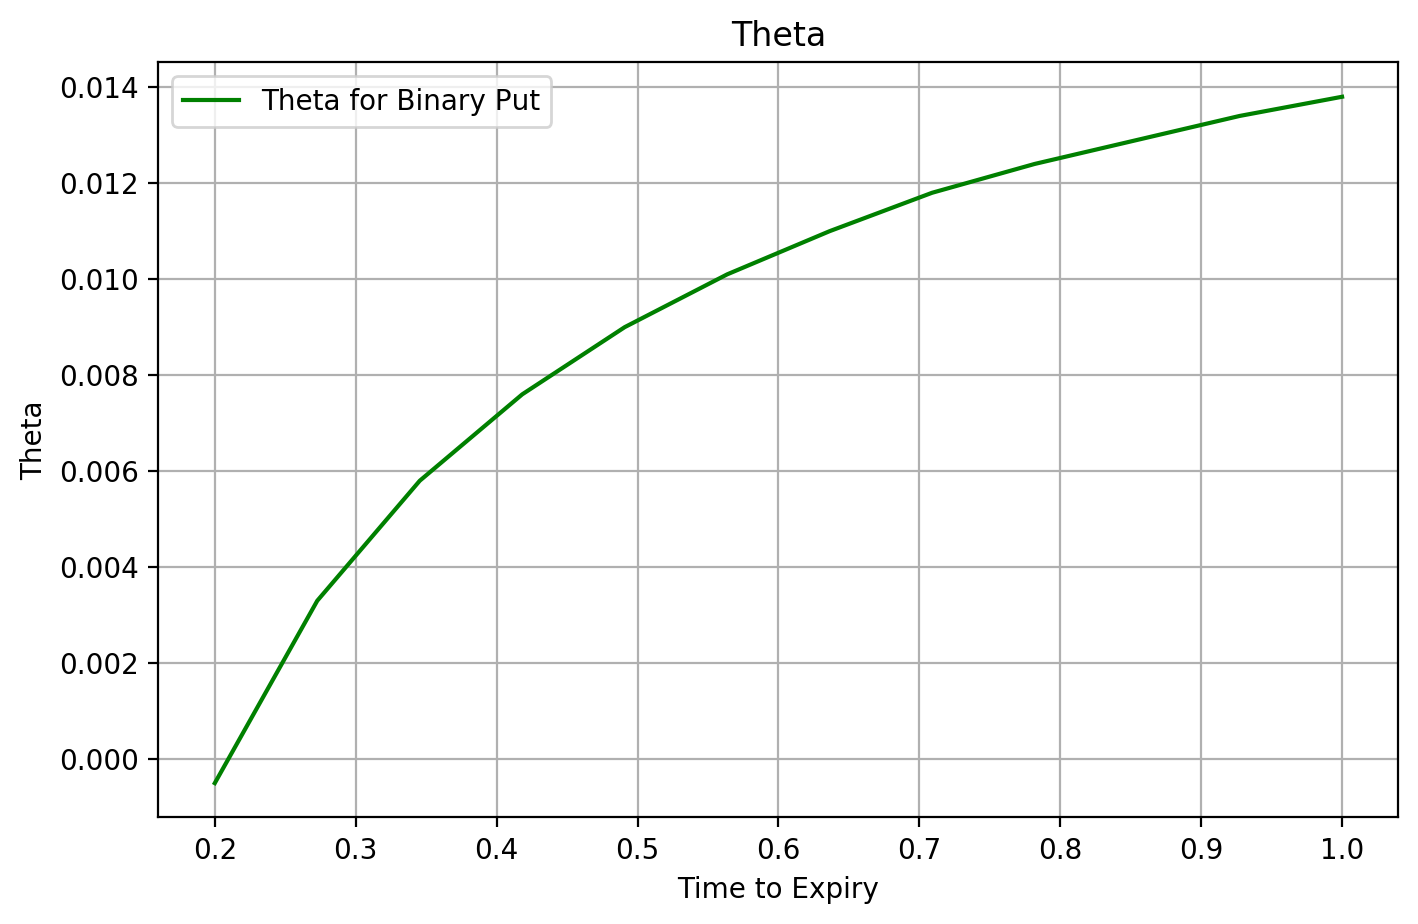

In [44]:
plt.figure(figsize=(8, 5), dpi=200)
plt.grid(b=True)
plt.plot(Th, _Th, '-', color="green")
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Binary Put'])

### Gamma

In [45]:
gamma(S=price, X=strike, t=time, r=.045, sig=sig)

0.0

In [48]:
g = np.linspace(50,150,11)
gama = np.zeros_like(g)
for index ,i in enumerate(g):
    gama[index] = gamma(S=i, X=100, t=1, r=.05, sig=.25)  

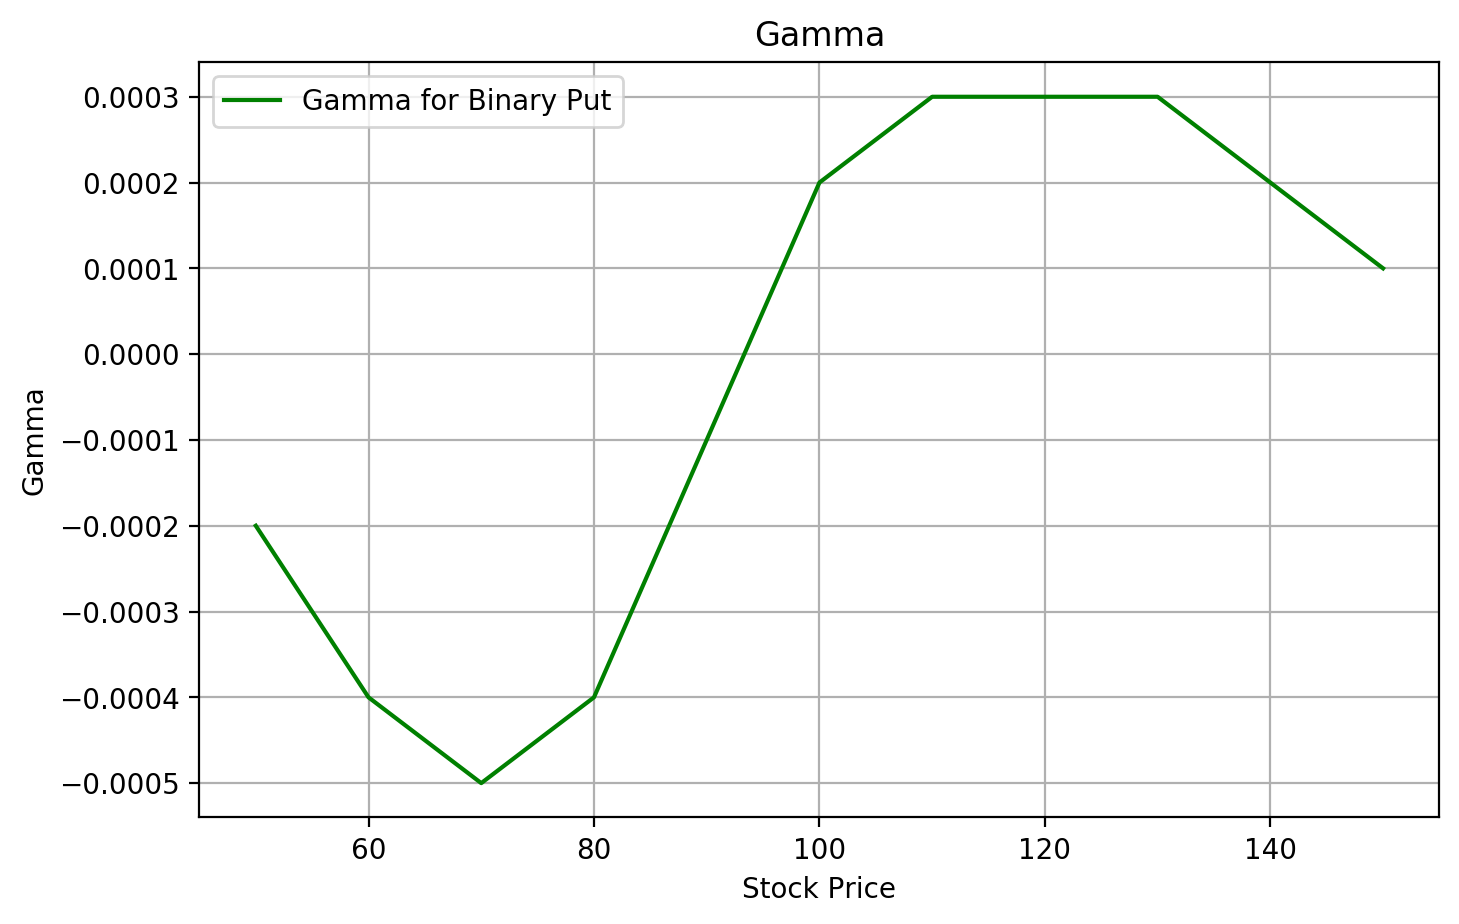

In [49]:
plt.figure(figsize=(8, 5), dpi=200)
plt.plot(g, gama, '-', color="green")
plt.grid(b=True)
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Binary Put'])

### Vega

In [50]:
vega(S=price, X=strike, t=time, r=.045, sig=sig)

0.145

In [52]:
v = np.linspace(0.1,0.4,13)
_v = np.zeros_like(v)
for index, i in enumerate(v):
    _v[index] = vega(S=100, X=100, t=1, r=.05, sig=i)    

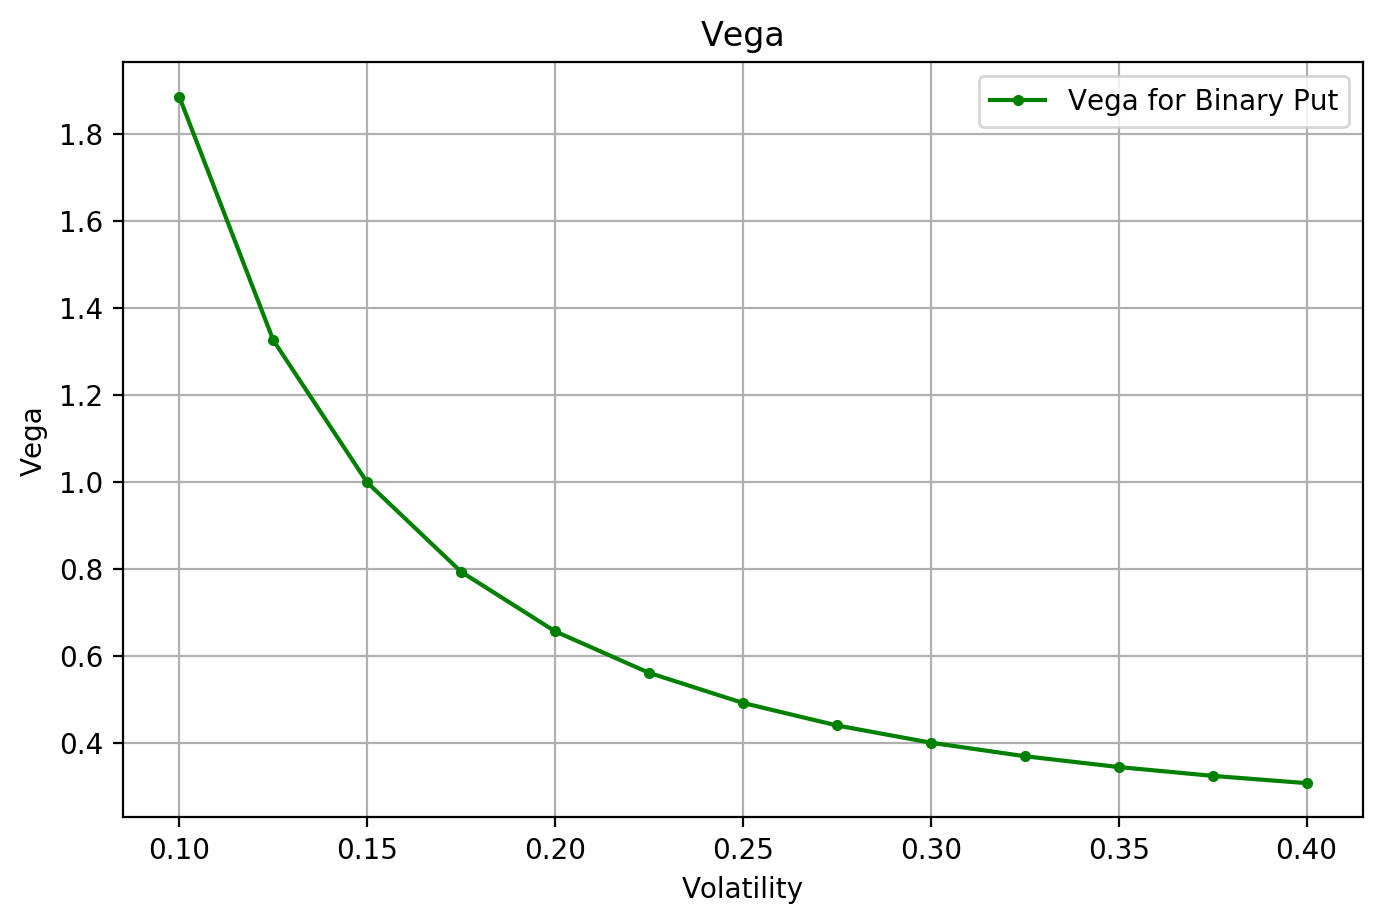

In [53]:
plt.figure(figsize=(8, 5), dpi=200)
plt.plot(v, _v, '.-', color="green")
plt.grid(b=True)
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Binary Put'])

In [78]:
stock = np.linspace(3100, 3500, 200)

bsm_prices = np. zeros_like(stock)
bmt_prices = np. zeros_like(stock)

for i,price in enumerate(stock):    
    bsm_prices[i] = BsmModel(S=price, X=strike, t=time, r=.045, sig=sig)
    bmt_prices[i] = BinomialModel(S=price, X=strike, t=time, r=.045, sig=sig, N=100)


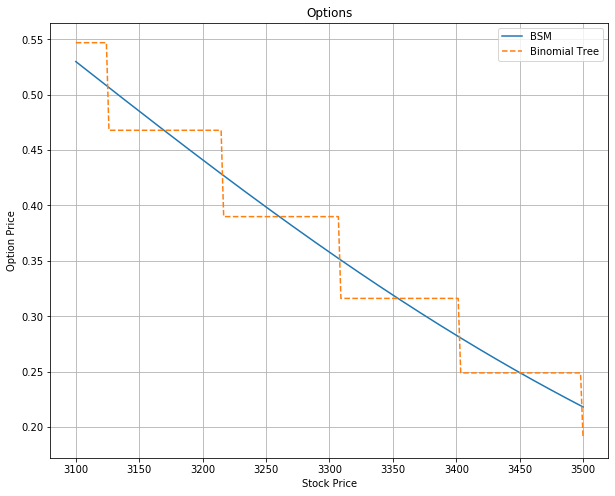

In [79]:
fig = plt.figure(figsize=[10, 8])

plt.grid(b=True)
plt.plot(stock, bsm_prices, '-')
plt.plot(stock, bmt_prices, '--')


plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('Options')
plt.legend(['BSM', "Binomial Tree"])